# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

Pada Workbook ipynb berikut saya akan melakukan Webscrapping menggunakan BeautifulSoup untuk menyelesaikan Capstone Algoritma Olympus, data yang saya scrapping adalah data Volume Penjualan Etherum pada Website https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [216]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [217]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" />\n<title>Ethereum USD Historical Data | CoinGecko</title>\n<meta name="description" content="Get Ethereum (ETH) USD historical prices." />\n\n<link rel="preload" href="h'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [218]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


Let's see how our beautifulsoup looks like. As you can see, the content is the same with our `get_url` object but it's tidier. Also beautifulsoup give us method to make it even more prettier, for tidyness purpouse we slice to only see first 500 character. 

In [219]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="/favicon.ico" rel="shortcut icon"/>
  <link href="/OpensearchDescription.xml" rel="search" type="application/opensearchdescription+xml">
   <title>
    Ethereum USD Historical Data | CoinGecko
   </title>
   <meta content="Get Ethereum (ETH) USD historical prices." name="description">
  


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [220]:
table = soup.find('table', attrs={'class':'table table-striped text-sm text-lg-normal'})
print(table.prettify()[1:500])

table class="table table-striped text-sm text-lg-normal">
 <thead>
  <tr>
   <th class="text-center">
    Date
   </th>
   <th class="text-center">
    Market Cap
   </th>
   <th class="text-center">
    Volume
   </th>
   <th class="text-center">
    Open
   </th>
   <th class="text-center">
    Close
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2021-06-30
   </th>
   <td class="text-center">
    $253,607,549,372
   </td>
   <td class="te


Table pada Data www.coingecko.com berada di dalam 'tr'

In [221]:
Data = table.find_all('tr')

Mengambil kolom 'Date' pada data www.coingecko.com

In [222]:
table.find_all('th', attrs={'class':'font-semibold text-center'})[:5]

[<th class="font-semibold text-center" scope="row">2021-06-30</th>,
 <th class="font-semibold text-center" scope="row">2021-06-29</th>,
 <th class="font-semibold text-center" scope="row">2021-06-28</th>,
 <th class="font-semibold text-center" scope="row">2021-06-27</th>,
 <th class="font-semibold text-center" scope="row">2021-06-26</th>]

In [223]:
table.find_all('th', attrs={'class':'font-semibold text-center'})[0].text

'2021-06-30'

### Extracting the Information

Now all the `beautiful soup` part is over. All left to do is doing some programming to extract all the data automaticly, you can do this manualy at this part but if your data too long I advice you use loop. I'll show you how to make looping for extracting the data, but before that let's check how long is our data to help our looping process. Since `find_all` will always return data in format list, we will use `len()` to check how long is our list.

Finding row length.

In [224]:
length = table.find_all('tr')
length = len(length)
length

548

Pada tahap ini saya akan melakukan looping process untuk mendapatkan kolom (Date, Volume) pada data www.coingecko.com
- Pertama saya membuat satu tempat untuk mengumpulkan kedua kolom tersebut
- Kemudian saya akan membuat loop dari data pertama sampai data terakhir sesuai panjang row pada data
- Berikut Scrpting yang saya lakukan

In [225]:
#scrapping process

tmp = [] #initiating a tuple

for i in range(1, length):
    
    #Mendapatkan Kolom Date
    Date = Data[i].th.text
    
    #Mendapatkan Kolom volume
    Volume = Data[i].find_all('td', attrs={'class':'text-center'})[1].text
    Volume = Volume.strip('\n')
    
    tmp.append((Date, Volume)) 
    
tmp

[('2021-06-30', '$27,149,143,847'),
 ('2021-06-29', '$30,629,329,806'),
 ('2021-06-28', '$24,316,408,028'),
 ('2021-06-27', '$24,249,510,321'),
 ('2021-06-26', '$25,981,381,067'),
 ('2021-06-25', '$22,447,489,242'),
 ('2021-06-24', '$28,098,744,045'),
 ('2021-06-23', '$38,755,019,937'),
 ('2021-06-22', '$39,499,960,408'),
 ('2021-06-21', '$26,235,850,447'),
 ('2021-06-20', '$20,456,963,375'),
 ('2021-06-19', '$26,204,484,921'),
 ('2021-06-18', '$25,708,624,827'),
 ('2021-06-17', '$26,150,320,395'),
 ('2021-06-16', '$26,803,957,680'),
 ('2021-06-15', '$28,128,172,338'),
 ('2021-06-14', '$29,382,118,964'),
 ('2021-06-13', '$28,235,882,062'),
 ('2021-06-12', '$26,751,786,966'),
 ('2021-06-11', '$33,075,957,437'),
 ('2021-06-10', '$43,973,432,438'),
 ('2021-06-09', '$48,344,195,674'),
 ('2021-06-08', '$37,385,872,210'),
 ('2021-06-07', '$29,050,162,249'),
 ('2021-06-06', '$34,731,979,705'),
 ('2021-06-05', '$39,996,583,175'),
 ('2021-06-04', '$38,104,663,185'),
 ('2021-06-03', '$39,148,856

Then after we fix our list a bit, as usual we will input it to pandas' dataframe.

## Creating data frame & Data wrangling

Put the array into dataframe

In [226]:
tmp = tmp[::-1]
tmp

[('2020-01-01', '$7,103,187,151'),
 ('2020-01-02', '$6,623,732,041'),
 ('2020-01-03', '$6,497,297,884'),
 ('2020-01-04', '$9,655,245,100'),
 ('2020-01-05', '$6,958,393,690'),
 ('2020-01-06', '$7,260,645,128'),
 ('2020-01-07', '$9,514,201,882'),
 ('2020-01-08', '$9,440,938,788'),
 ('2020-01-09', '$10,095,847,759'),
 ('2020-01-10', '$7,280,640,218'),
 ('2020-01-11', '$10,273,370,788'),
 ('2020-01-12', '$9,737,605,323'),
 ('2020-01-13', '$8,488,793,478'),
 ('2020-01-14', '$8,019,794,567'),
 ('2020-01-15', '$18,970,204,899'),
 ('2020-01-16', '$17,862,385,532'),
 ('2020-01-17', '$14,605,493,159'),
 ('2020-01-18', '$15,915,322,020'),
 ('2020-01-19', '$15,808,136,411'),
 ('2020-01-20', '$14,003,433,869'),
 ('2020-01-21', '$10,983,216,126'),
 ('2020-01-22', '$8,267,420,453'),
 ('2020-01-23', '$8,809,189,829'),
 ('2020-01-24', ' $9,017,537,604'),
 ('2020-01-25', '$11,043,498,595'),
 ('2020-01-26', '$8,673,816,085'),
 ('2020-01-27', '$10,518,901,915'),
 ('2020-01-28', '$12,435,457,693'),
 ('2020

In [227]:
import pandas as pd

df = pd.DataFrame(tmp, columns=('Date', 'Volume'))
df.head()

,Date,Volume
0,2020-01-01,"$7,103,187,151"
1,2020-01-02,"$6,623,732,041"
2,2020-01-03,"$6,497,297,884"
3,2020-01-04,"$9,655,245,100"
4,2020-01-05,"$6,958,393,690"


In [228]:
df.dtypes

Date      object
Volume    object
dtype: object

Data yang kita punya memiliki tipe data object yang seharusnya pada kolom 'Date' tipe data nya adalah datetime sedangkan untuk kolom 'Volume' tipe datanya adalah integer

In [229]:
df['Date'] = df['Date'].astype('datetime64')
df['Volume'] = df['Volume'].str.replace("$","", regex = False)
df['Volume'] = df['Volume'].str.replace(",","")
df['Volume'] = df['Volume'].astype('int64')

df.dtypes

Date      datetime64[ns]
Volume             int64
dtype: object

### Visualisasi yang saya lakukan ada Dua

1. Data Volume Penjualan Etherum harian dibuat dalam plot untuk mengetahui seberapa fluktuatif sebaran data dan juga untuk mengetahui apakah ada hari dimana volume penjualan Etherum meningkat sangat tinggi dibanding hari-hari lainnya, dan
2. Data Volume Penjualan Etherum di jumlahkan setiap bulannya untuk mengetahui di bulan apa Volume Penjualan Etherum tertinggi.

In [242]:
#setting date as index
df1 = df.set_index('Date')
df1.head()

,Volume,YearMonth
Date,,
2020-01-01,7103187151,2020-01
2020-01-02,6623732041,2020-01
2020-01-03,6497297884,2020-01
2020-01-04,9655245100,2020-01
2020-01-05,6958393690,2020-01


In [243]:
df1.shape

(547, 2)

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

In [235]:
import matplotlib.pyplot as plt

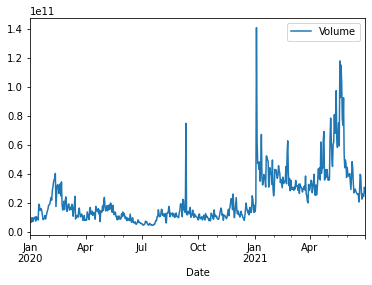

In [244]:
df1.plot()

In [233]:
df['YearMonth'] = df['Date'].dt.to_period('M')
df

,Date,Volume,YearMonth
0,2020-01-01,7103187151,2020-01
1,2020-01-02,6623732041,2020-01
2,2020-01-03,6497297884,2020-01
3,2020-01-04,9655245100,2020-01
4,2020-01-05,6958393690,2020-01
...,...,...,...
542,2021-06-26,25981381067,2021-06
543,2021-06-27,24249510321,2021-06
544,2021-06-28,24316408028,2021-06
545,2021-06-29,30629329806,2021-06


In [234]:
df2 = pd.crosstab(index=df['YearMonth'], 
                  columns='sum', 
                  values=df['Volume'],
                  aggfunc='sum').sort_values(by='sum', ascending=False)
df2

col_0,sum
YearMonth,
2021-05,2082689275782
2021-01,1344696753045
2021-04,1154178713713
2021-02,1063166950729
2021-06,953341330415
2021-03,924309813353
2020-02,744411720529
2020-09,467796382663
2020-12,446283210139


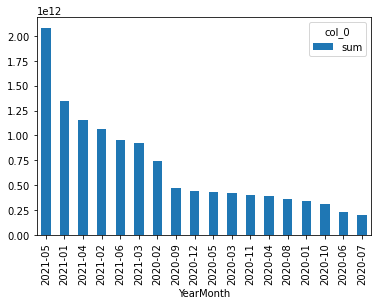

In [239]:
df2.plot.bar()

## ANALYSIS OF ETHEREUM VOLUME STOCK



- Volume Penjualan Etherum di Tahun 2020 Cenderung Stabil hanya saja terdapat Volume Penjualan Etherum di bulan September yang sangat tinggi dibanding hari-hari lainnya.
- Volume Penjualan Etherum di Tahun 2021 lebih meningkat dibanding tahun 2020 namun terjadi fluktuatif yang beragam.
- Volume Penjualan Etherum tertinggi secara berturut-turut terjadi pada bulan Mei, Januari, April 2021.

### Update Requirements.txt

In [247]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.